# Author: Shantanu Tyagi
# Date: 20-04-2021
# ID: 201801015

## Question 1: Various visualisations of the IRIS dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import numpy as np
iris = pd.read_csv(r"Iris.csv")

The first plot is a joint plot which consists of a bivariate scatterplot and univariate histograms in the same figure. The first scatter plot is for the Sepal width and length and the second one is for the Petal width and length. The histograms show the probabilistic spread of individual species.

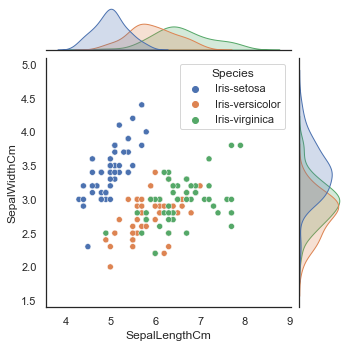

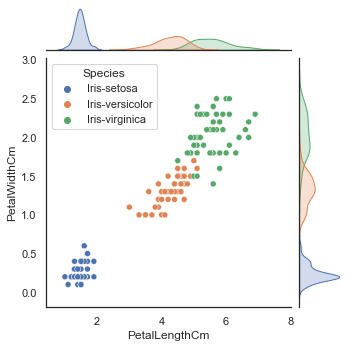

In [5]:
sns.set(style="white", color_codes=True)
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5, hue="Species")
sns.set(style="white", color_codes=True)
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, size=5, hue="Species")

A simple scatter plot without the histogram at the boundaries is shown below

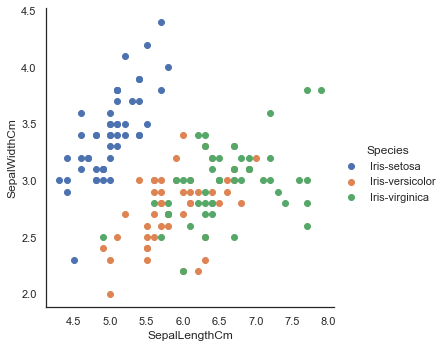

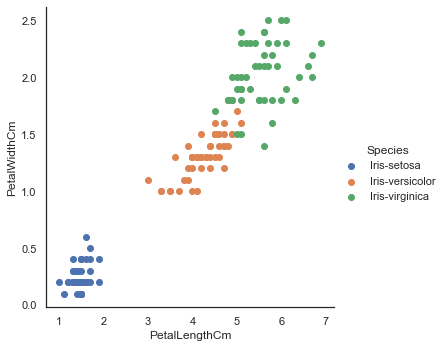

In [6]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

Another plot useful for looking at univariate relations is the kdeplot. It creates  density estimate of the underlying feature. This plot has been made for all the 4 features in the dataset with color distinction between the species.

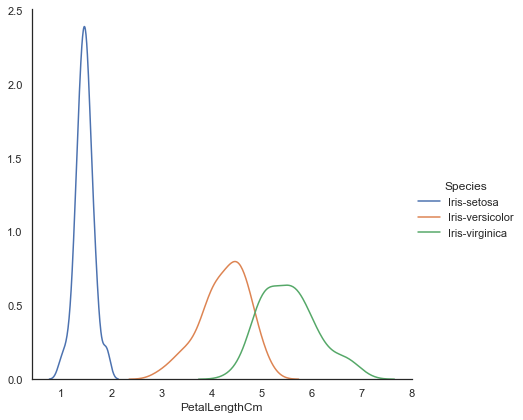

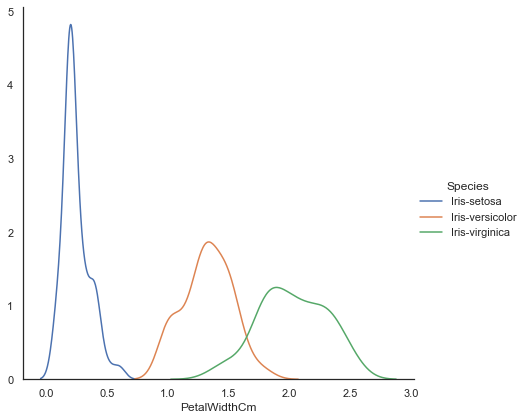

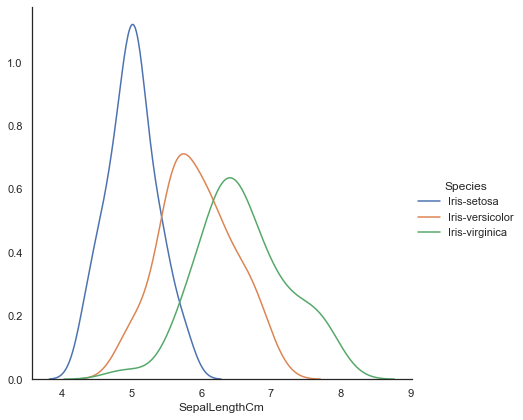

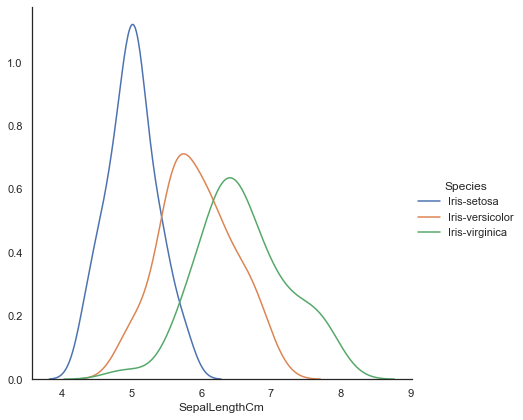

In [7]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalWidthCm") \
   .add_legend()
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()

Next we have pairplot which shows the bivariate relation between each pair of features.

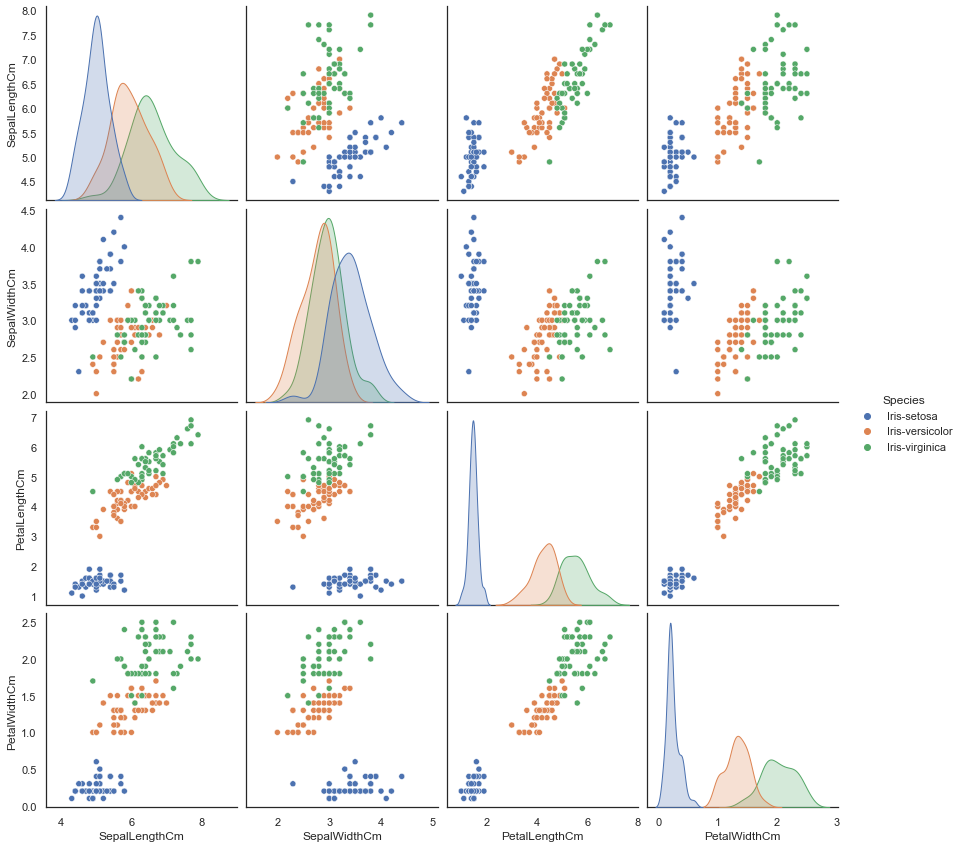

In [8]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

Next we have andrew's curves. These involve using attributes of samples as coefficients for Fourier series and then plotting them respectively.

<AxesSubplot:>

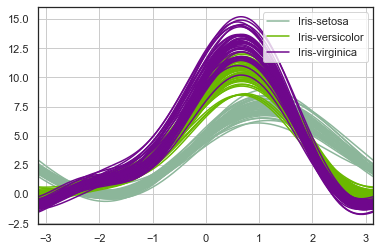

In [9]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

Next multivariate visualization is parallel coordinates plotting. This plots each feature on a separate column & then draws lines connecting the features for each data sample.

<AxesSubplot:>

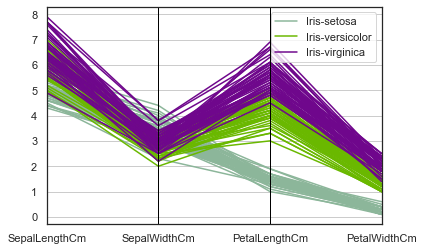

In [10]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

Third multivariate visualisation is the radviz plot. Each feature is a point on a 2D plane and each sample is thought of as being connected to the features by a springs whose weights depend on the relative value fr that feature.

<AxesSubplot:>

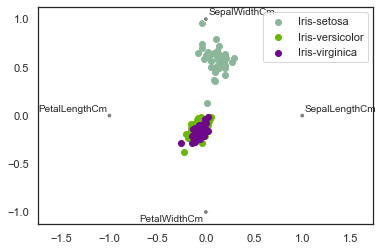

In [11]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

Next we have the frequency bar graph for each of the species

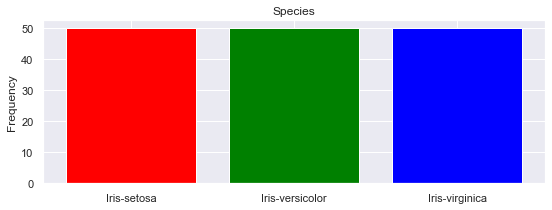

In [21]:
def bar_plot(variable):
    var = iris[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue, color = ["red","green","blue"])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    #print("{}:\n{}".format(variable,varValue))
categorical = (iris.dtypes == "object")
categorical_list = list(categorical[categorical].index)
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)
    index+=1

Visualizing the same using a pie plot

<AxesSubplot:ylabel='Species'>

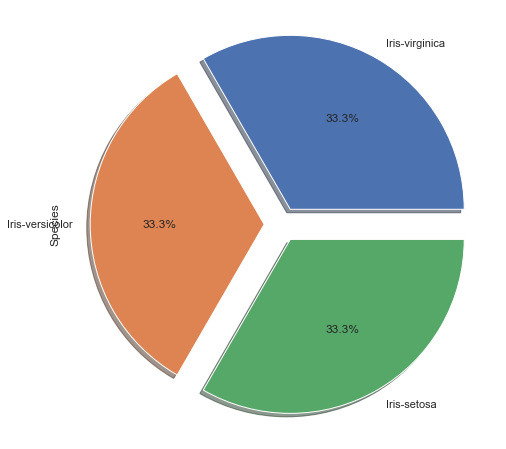

In [61]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

Next we have the histograms for each of the features showing the frequency of various size intervals

Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

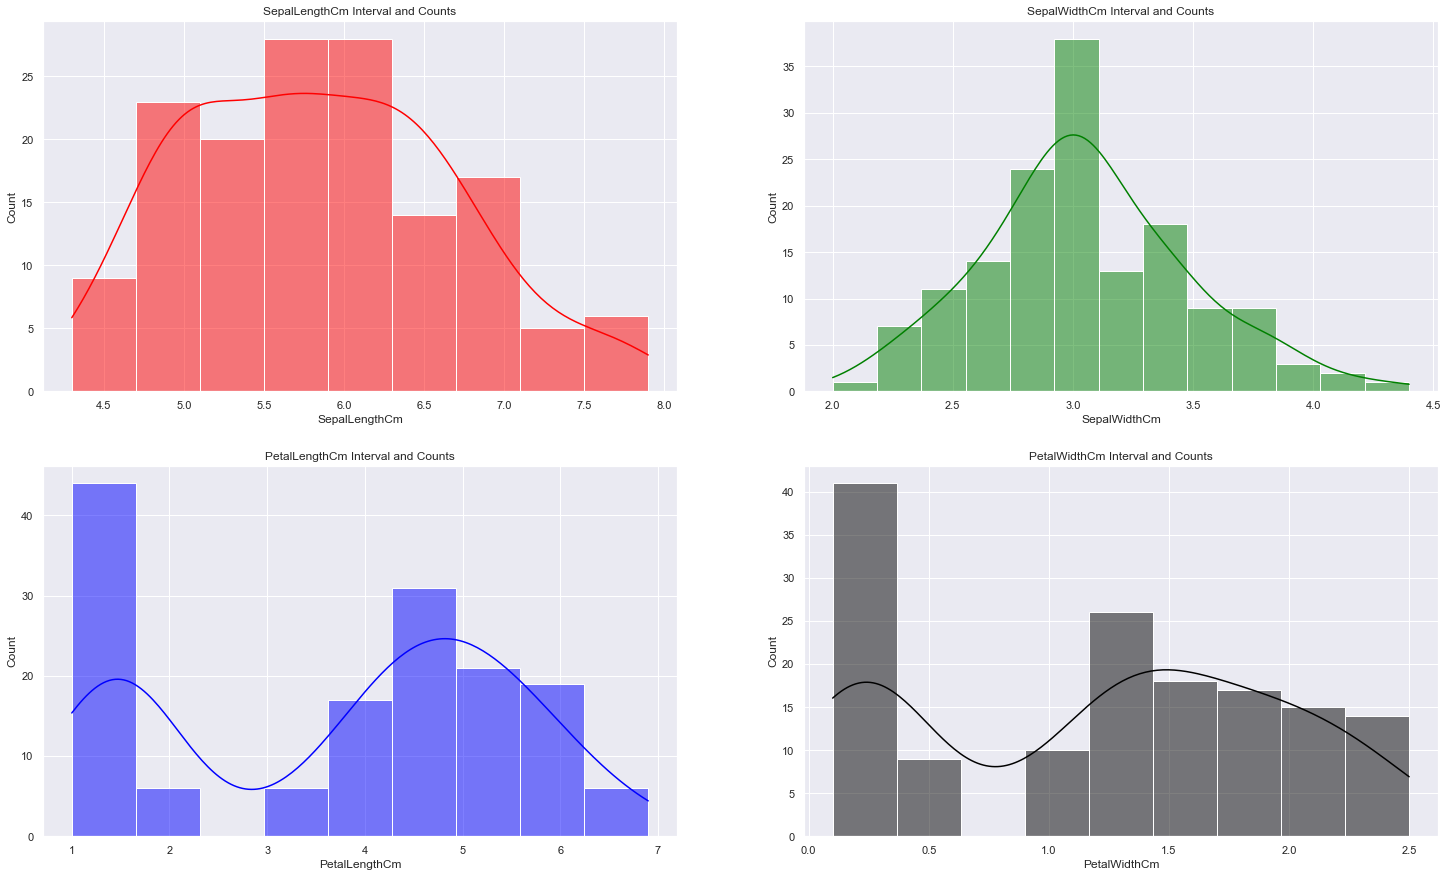

In [25]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.histplot(iris['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')
plt.subplot(2,2,2)
sns.histplot(iris['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')
plt.subplot(2,2,3)
sns.histplot(iris['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')
plt.subplot(2,2,4)
sns.histplot(iris['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

Next we have the correlation heatmap for the 4 features

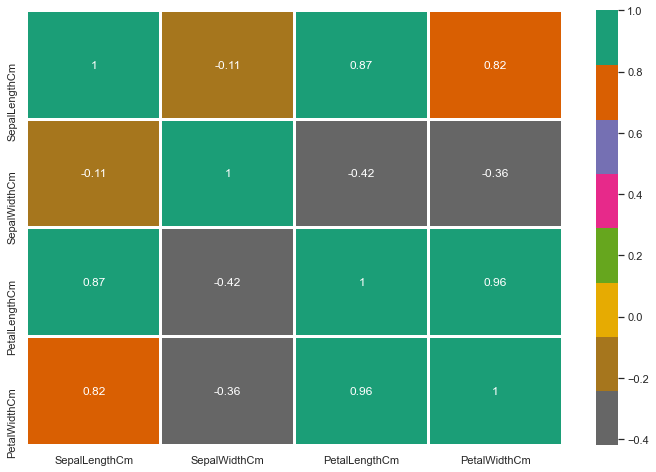

In [30]:
plt.figure(figsize=(12,8)) 
sns.heatmap(iris.iloc[:,1:].corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Next we have the feature wise bar plot comparing various species

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

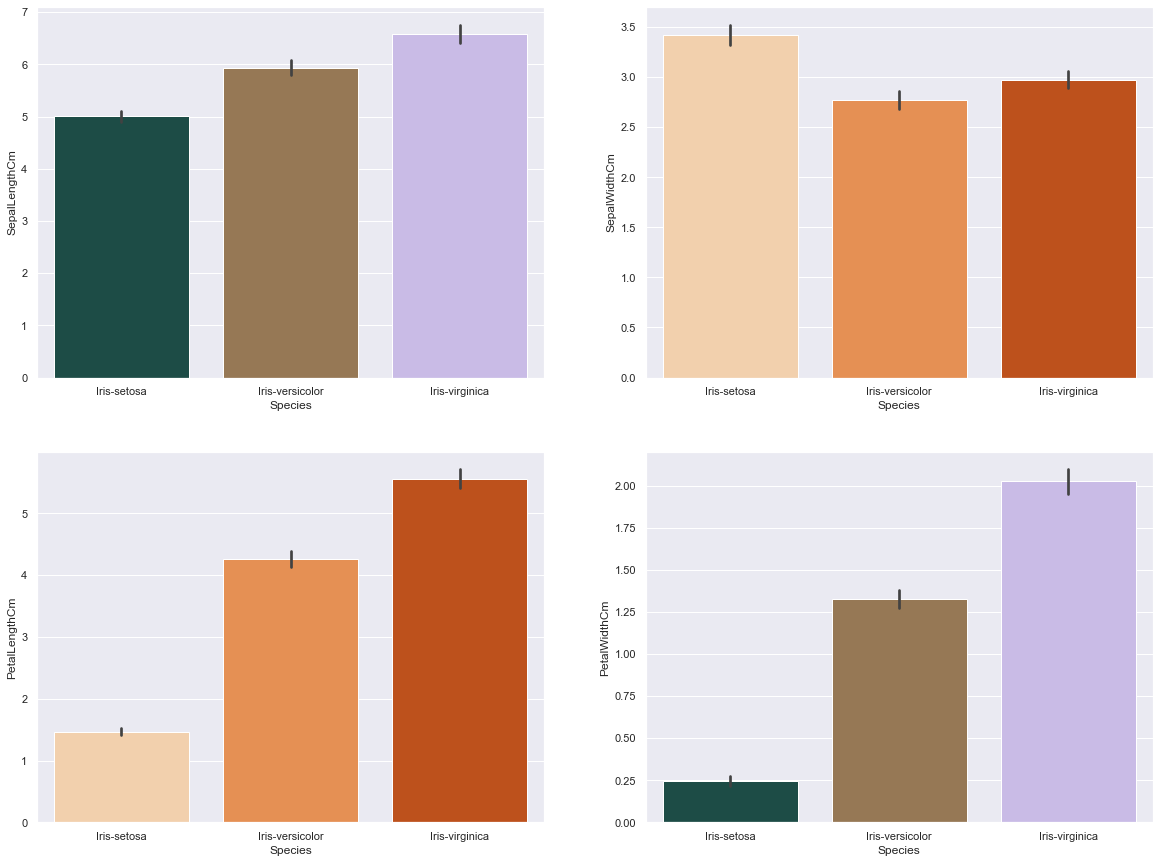

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = iris, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = iris, palette="cubehelix")

The violin plot for the same is given below. This gives us an idea about the density spread

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

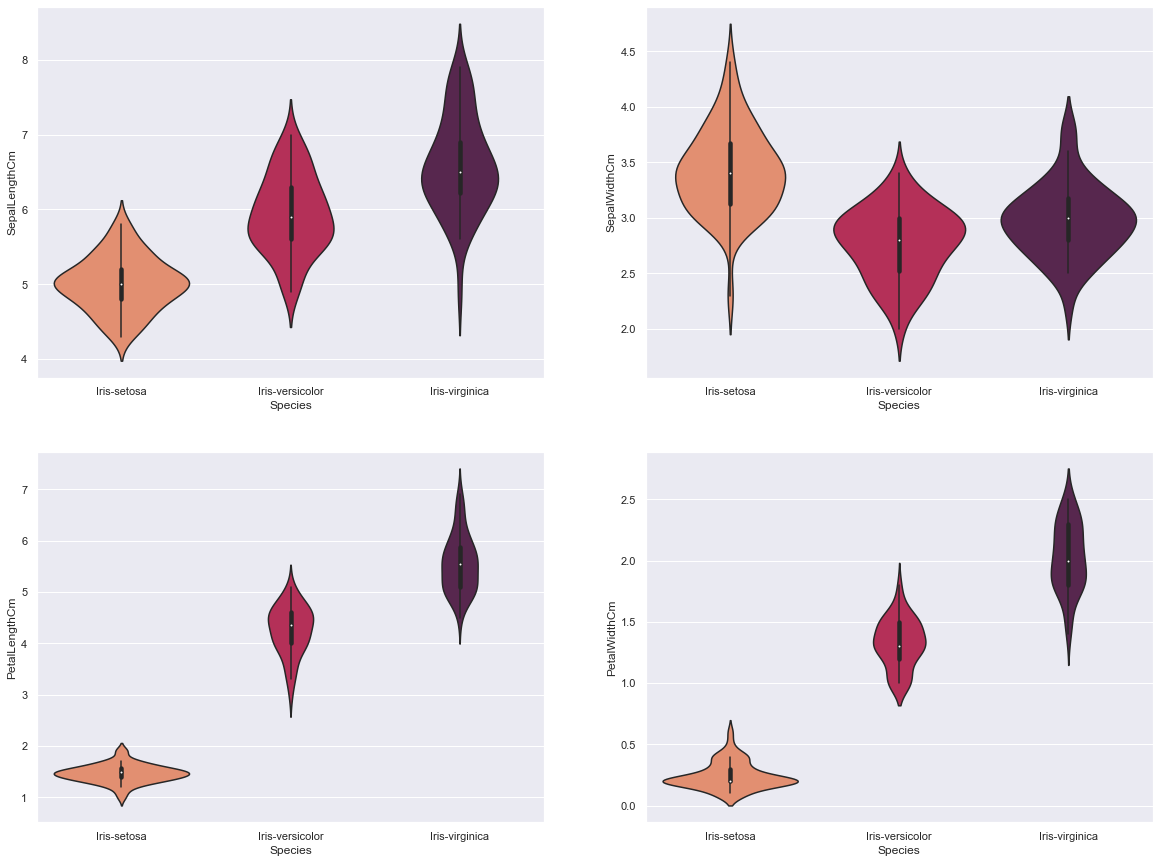

In [57]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette="rocket_r")
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette="rocket_r")
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris, palette="rocket_r")
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris, palette="rocket_r")

The box plot for the same is given below

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

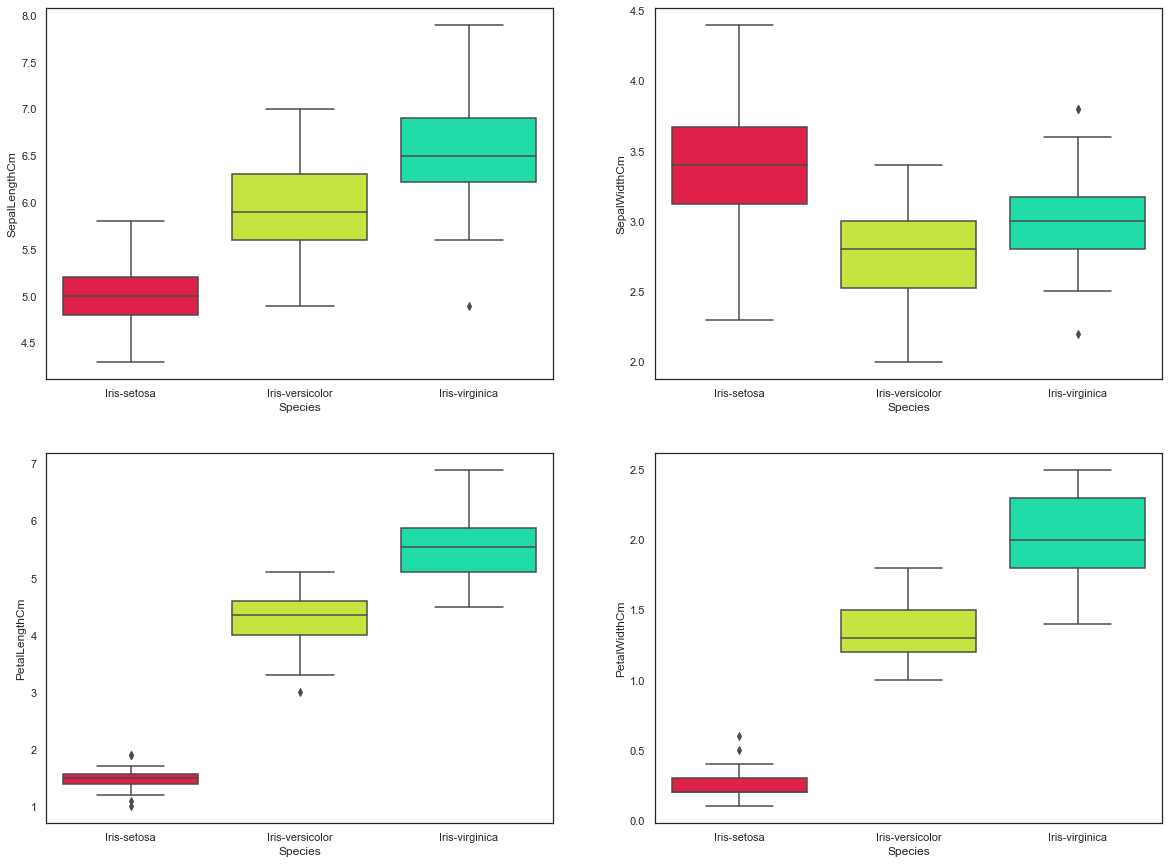

In [68]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris, palette="gist_ncar_r")

Addind strip plot to the box plot we get the following

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

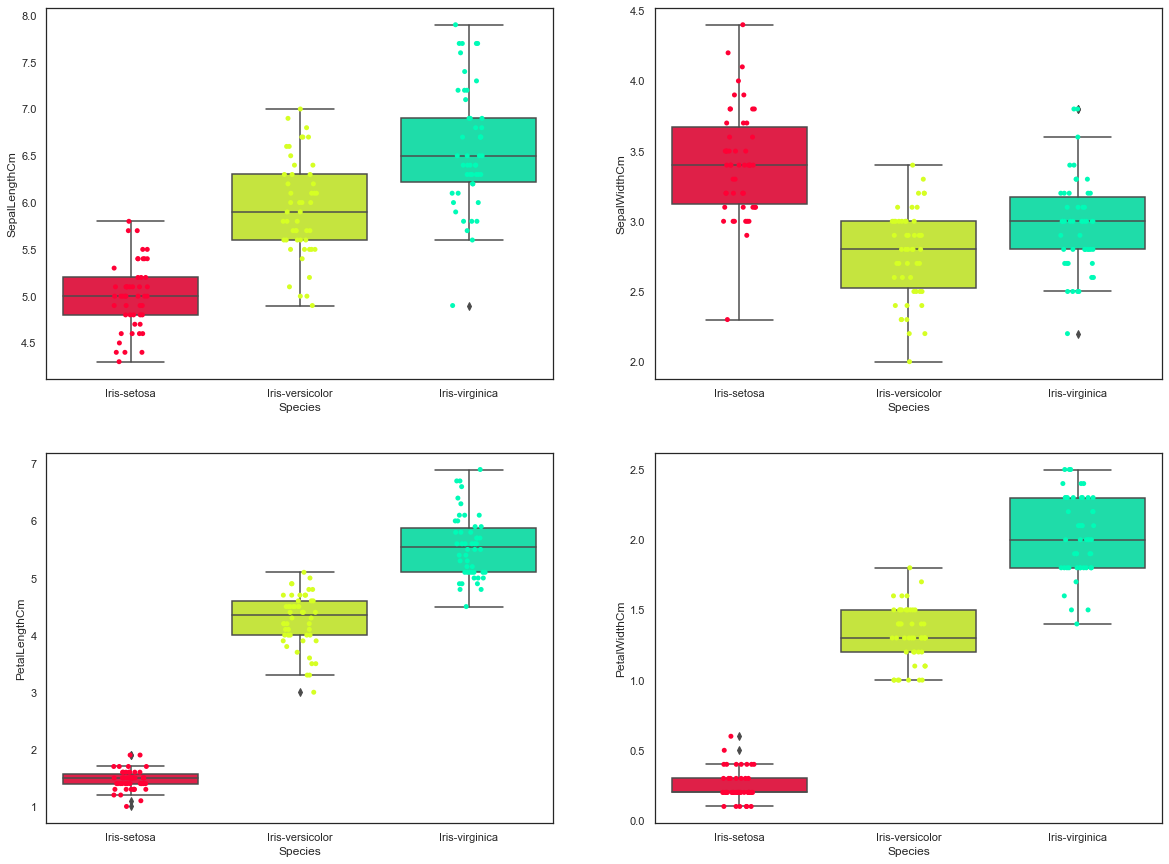

In [69]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette="gist_ncar_r")
sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="gray", palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette="gist_ncar_r")
sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="gray", palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris, palette="gist_ncar_r")
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray", palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris, palette="gist_ncar_r")
sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray", palette="gist_ncar_r")

Next we have the histograms for each of the features showing the density for various size intervals

Text(0.5, 1.0, 'PetalWidth Interval')

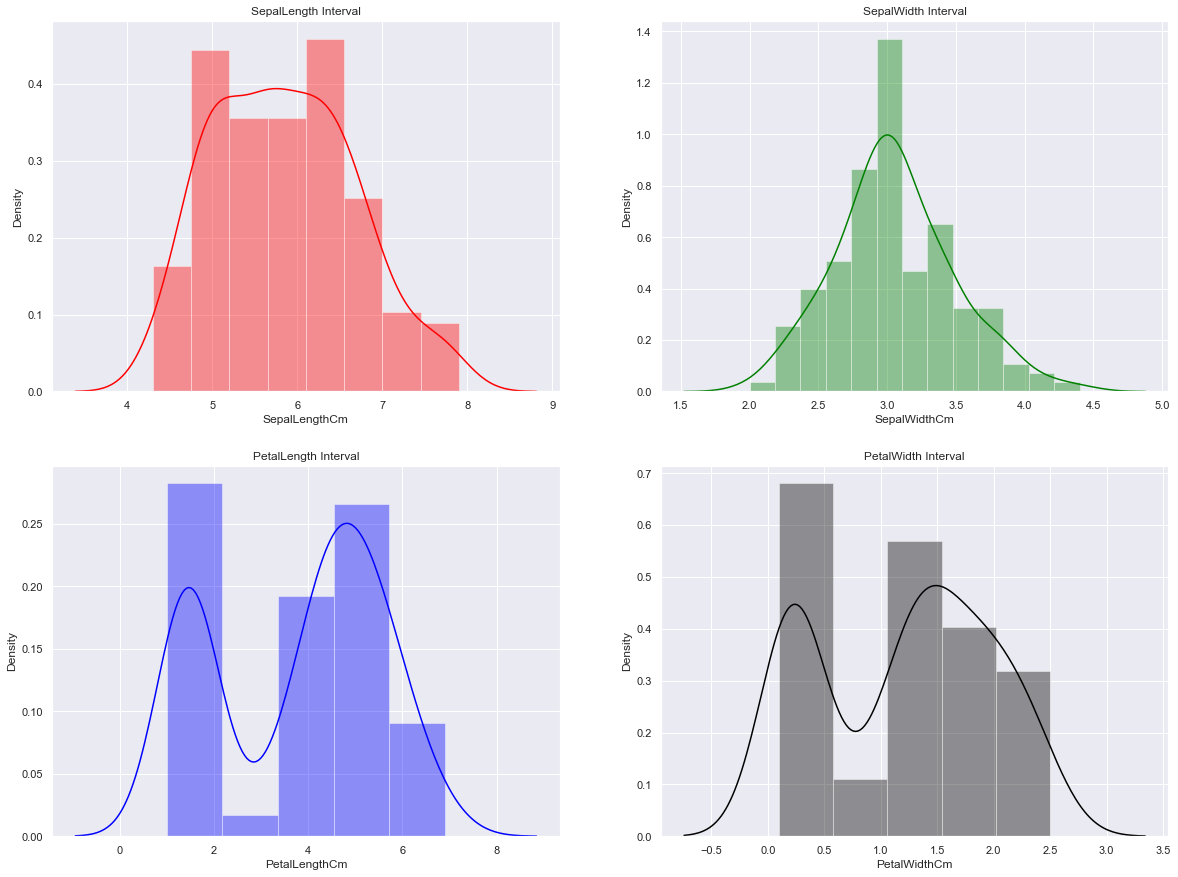

In [59]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(iris['SepalLengthCm'], color="red").set_title('SepalLength Interval')
plt.subplot(2,2,2)
sns.distplot(iris['SepalWidthCm'], color="green").set_title('SepalWidth Interval')
plt.subplot(2,2,3)
sns.distplot(iris['PetalLengthCm'], color="blue").set_title('PetalLength Interval')
plt.subplot(2,2,4)
sns.distplot(iris['PetalWidthCm'], color="black").set_title('PetalWidth Interval')

A different way of representing a join plot

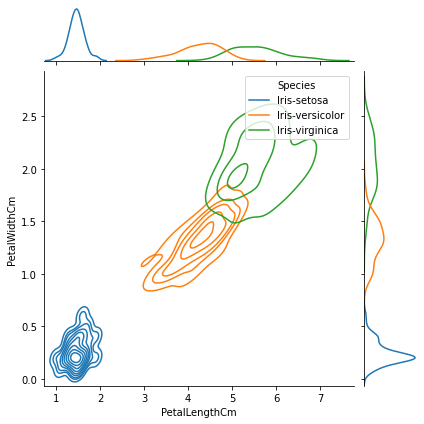

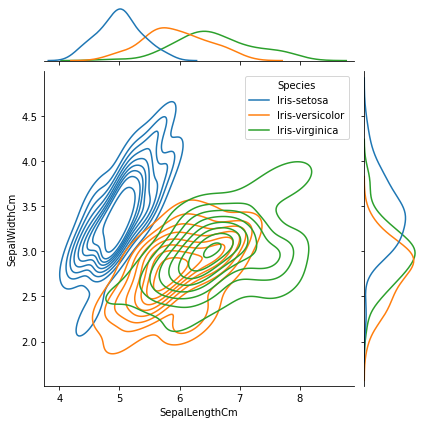

In [12]:
sns.jointplot(data=iris, x='PetalLengthCm', y="PetalWidthCm",  hue='Species', kind='kde', height=6)
plt.show()
sns.jointplot(data=iris, x='SepalLengthCm', y="SepalWidthCm",  hue='Species', kind='kde', height=6)
plt.show()

## Question 2: Handling missing data - NFL Kaggle dataset

In [32]:
nfl_data = pd.read_csv(r"NFL Play by Play 2009-2016 (v3).csv")

In [33]:
nfl_data.sample(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
46463,2010-09-12,2010091210,16,3,2.0,01:15,2,975.0,33.0,PHI,...,NaN,0.069114,0.930886,0.062538,0.937462,0.069114,-0.006576,NaN,NaN,2010
93597,2011-09-18,2011091803,8,2,2.0,11:29,12,2489.0,38.0,NYJ,...,-1.365053,0.707413,0.292587,0.731835,0.268165,0.292587,-0.024423,0.020399,-0.044822,2011
189851,2013-09-29,2013092901,10,3,1.0,14:24,15,1764.0,32.0,CIN,...,-1.008661,0.583538,0.416462,0.608311,0.391689,0.416462,-0.024774,0.009114,-0.033888,2013
287435,2015-10-25,2015102500,18,4,1.0,13:41,14,821.0,37.0,JAC,...,NaN,0.515049,0.484951,0.530523,0.469477,0.484951,-0.015474,NaN,NaN,2015
136893,2012-09-10,2012091000,3,1,NaN,06:03,7,3063.0,5.0,CIN,...,NaN,0.798151,0.201849,0.790333,0.209667,0.798151,-0.007818,NaN,NaN,2012
92904,2011-09-18,2011091807,6,2,3.0,14:08,15,2648.0,4.0,GB,...,0.432977,0.880625,0.119375,0.803132,0.196868,0.119375,0.077494,0.067676,0.009817,2011
228615,2014-09-14,2014091406,16,3,1.0,10:57,11,1557.0,0.0,DAL,...,NaN,0.118564,0.881436,0.122740,0.877260,0.881436,-0.004176,NaN,NaN,2014
283566,2015-10-11,2015101106,16,4,2.0,14:17,15,857.0,39.0,TEN,...,NaN,0.578484,0.421516,0.532119,0.467881,0.578484,-0.046365,NaN,NaN,2015
99108,2011-10-02,2011100203,9,2,4.0,04:13,5,2053.0,5.0,DAL,...,NaN,0.890076,0.109924,0.893652,0.106348,0.109924,-0.003577,NaN,NaN,2011
121830,2011-12-04,2011120402,19,4,3.0,08:14,9,494.0,4.0,BUF,...,0.314649,0.078964,0.921036,0.101999,0.898001,0.078964,0.023035,0.021340,0.001694,2011


In [36]:
# We see that there are some missing values in our dataset
missing_values_count = nfl_data.isnull().sum()
# now we have the count of the missing values
missing_values_count

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [37]:
# we see that some columns have a lot of missing data than others
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
(total_missing/total_cells) * 100

24.85847694188906

In [41]:
# nearly 1/4 th of the total data seems to be missing. But not all of the data is important.
# The useful data like date and game ID are complete. Some of the missing data is not abailable because either
# it was not recorded or because that data actually needs to be empty since that event did not occur.
# there are various things we can do with this missing data.

1. Drop missing values: we can either remove the rows or the columns with missing data.

In [42]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [46]:
# this resulted in all rows getting deleted since every row had atleastone missing value.
# thus it will be better if we drop the columns instead
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.sample(10)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
67891,2010-11-14,2010111405,19,3,2,10,21,1,21,0,...,0,None,3,3,3,3,3,0.000000,0.0,2010
344060,2016-11-20,2016112004,16,4,14,10,65,1,8,0,...,0,None,3,3,3,3,3,0.000000,0.0,2016
61130,2010-10-24,2010102404,17,3,6,10,26,1,4,0,...,0,None,3,3,3,3,3,0.000000,0.0,2010
106332,2011-10-23,2011102306,11,2,1,7,7,1,4,0,...,0,None,1,1,1,1,1,0.000000,0.0,2011
319555,2016-09-15,2016091500,1,1,12,10,39,1,1,0,...,0,None,3,3,3,3,3,0.000000,0.0,2016
47541,2010-09-19,2010091912,1,1,15,11,8,1,9,0,...,0,None,3,3,3,3,3,0.000000,0.0,2010
158707,2012-11-11,2012111104,16,3,11,0,0,1,0,0,...,0,None,3,3,3,3,3,0.000000,0.0,2012
78814,2010-12-12,2010121201,6,2,10,0,89,1,0,1,...,0,None,3,3,3,3,3,0.990795,0.0,2010
183900,2013-09-15,2013091504,11,2,2,10,39,1,10,0,...,0,None,3,3,3,3,3,0.000000,0.0,2013
53911,2010-10-03,2010100305,15,3,1,2,26,1,0,0,...,0,None,3,3,3,3,3,0.000000,0.0,2010


In [47]:
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


In [48]:
# We lost more than half of the columns after removing those with null values

2. Filling the missing data column wise

In [56]:
# we take a few columns that need to be filled
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season']
subset_nfl_data.head()

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [57]:
# We can fill them all using 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,4.620003,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,0.068885,0.000000,0.000000,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.000000,0.000000,2016
362444,-0.692792,0.000000,0.000000,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.000000,0.000000,2016
362445,0.000000,0.000000,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,0.000000,0.000000,2016


In [58]:
# we can fill null values with the values of their vertical neighbours and then replace the remaining null values with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,4.620003,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,0.068885,0.000000,0.000000,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.000000,0.000000,2016
362444,-0.692792,0.000000,0.000000,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.000000,0.000000,2016
362445,0.000000,0.000000,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,0.000000,0.000000,2016


3. Imputation: Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

In [68]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(subset_nfl_data)
data = pd.DataFrame(data_with_imputed_values, columns = subset_nfl_data.columns)
data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.526933,-0.386522,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015209,-0.010492,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.526933,-0.386522,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015209,-0.010492,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,4.620003,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016.0
362443,0.068885,0.526933,-0.386522,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.015209,-0.010492,2016.0
362444,-0.692792,0.526933,-0.386522,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.015209,-0.010492,2016.0
362445,0.000000,0.526933,-0.386522,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,0.015209,-0.010492,2016.0
